In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
# diretorios de treino e teste

dir_treino = "deteccao_emocoes_imagens/train"
dir_teste = "deteccao_emocoes_imagens/test"

In [3]:
# criando os dataset de treino e teste

gerar_datatreino = ImageDataGenerator(rescale=1./255)
gerar_datateste = ImageDataGenerator(rescale=1./255)

Xtreino = gerar_datatreino.flow_from_directory(directory=dir_treino, 
                                                      target_size=(48,48),
                                                      batch_size= 70, color_mode = 'grayscale',
                                                      class_mode='categorical')

Xteste = gerar_datateste.flow_from_directory(directory=dir_teste, 
                                                      target_size=(48,48),
                                                      batch_size= 64, color_mode = 'grayscale',
                                                      class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# dicionário com os significados de cada classe

dict_emocoes = {
    0: "Bravo(a)", 
    1: "Com Nojo", 
    2: "Com medo", 
    3: "Felilz",
    4: "Neutro", 
    5: "Triste", 
    6: "Surpreso(a)"
}

In [5]:
type(Xtreino)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [6]:
# pegando o primeiro batch para visualizar as suas imagens

datasetTreino = tf.data.Dataset.from_tensor_slices(Xtreino[1])
listaTreino = list(datasetTreino.as_numpy_iterator())

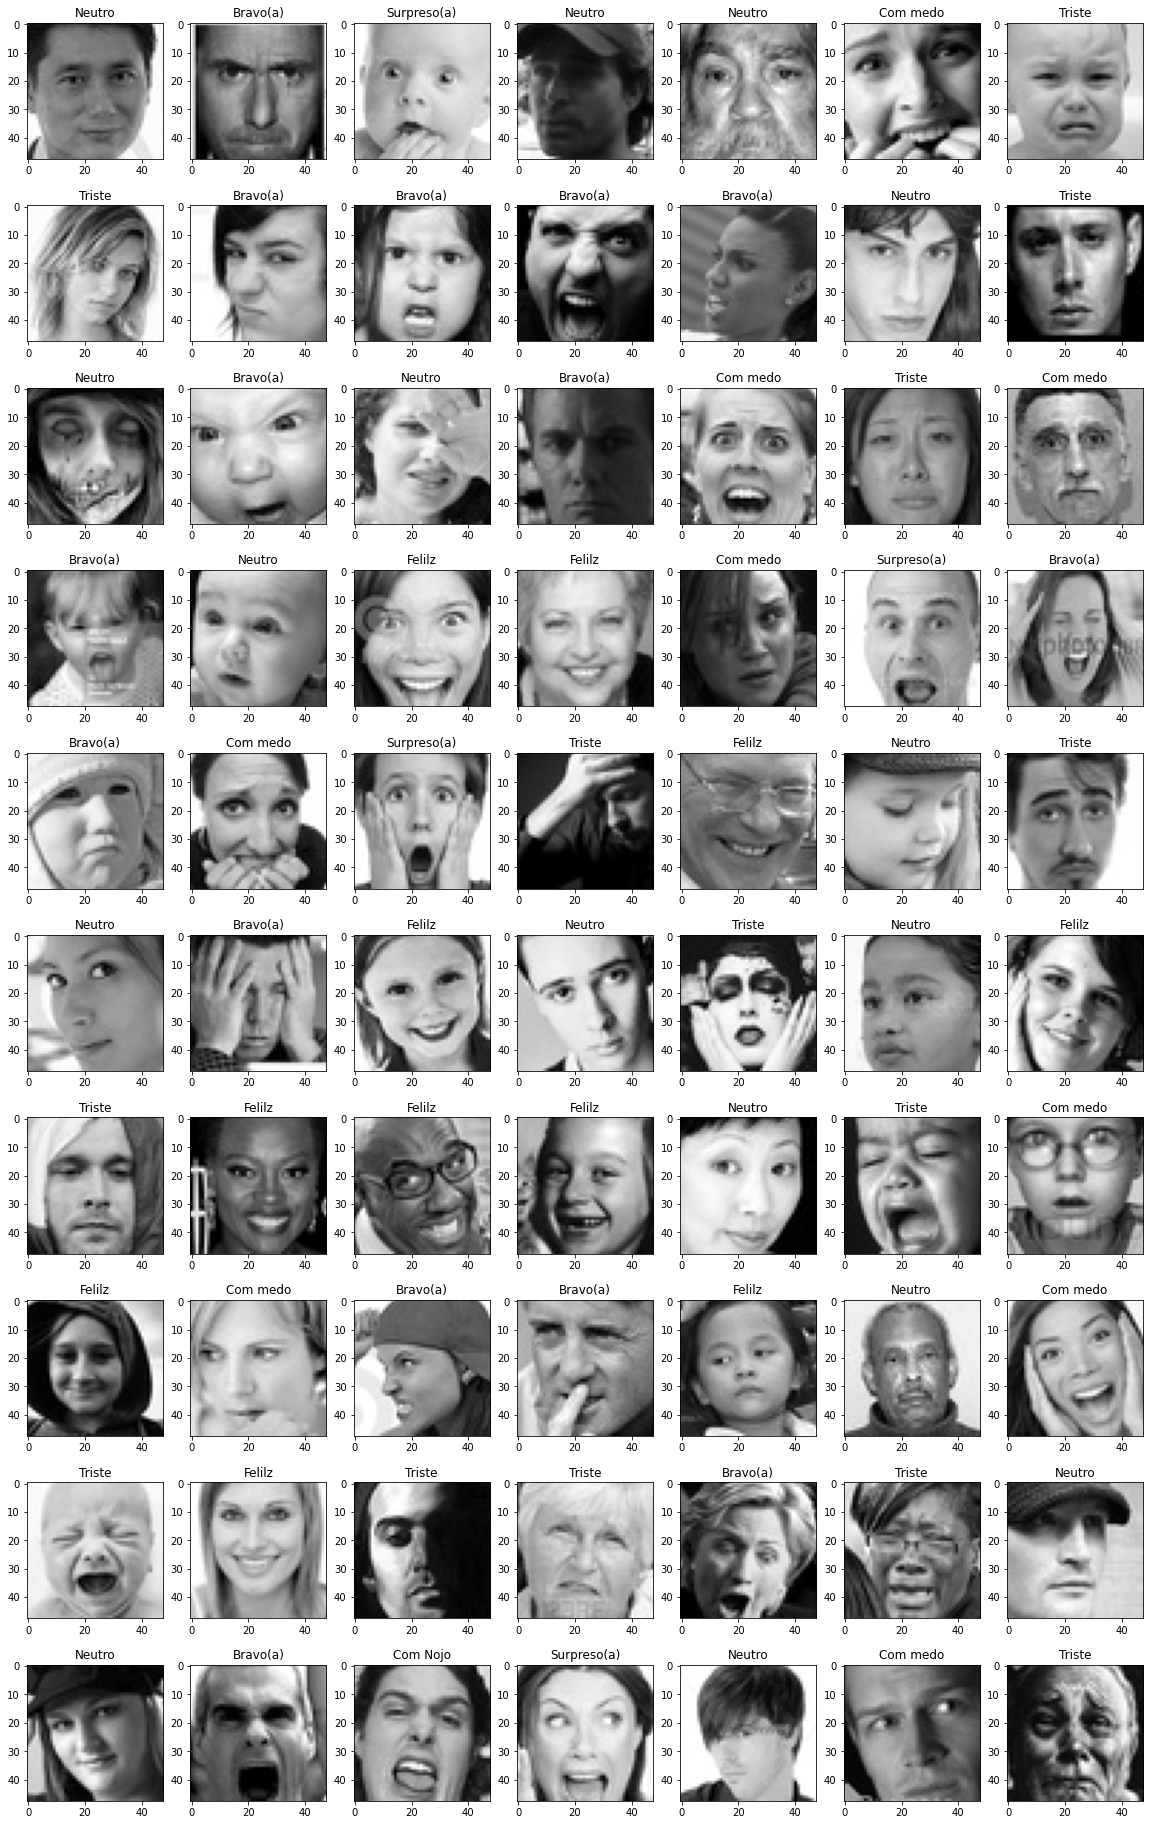

In [7]:
# visualizando algumas imagens

plt.figure(figsize=(20,33))
for n in range(len(listaTreino)):
    plt.subplot(10,7,n+1)
    plt.imshow(listaTreino[n][0],cmap='gray')
    plt.title(dict_emocoes[np.argmax(listaTreino[n][1])])
plt.show()